<a href="https://colab.research.google.com/github/pedro-de-bastos/CS146/blob/master/PCW_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The 95% Confidence Intervals for P are: [0.082 0.119]


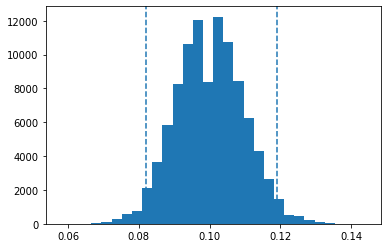

In [34]:
x = np.linspace(0, 1000)

samples = sts.binom.rvs(1000, (1/10), size=100000)/1000


quantile = np.quantile(samples, (0.025, 0.975))
plt.hist(samples, bins=30)
plt.axvline(x=quantile[0], ls='--')
plt.axvline(x=quantile[1], ls='--')
print("The 95% Confidence Intervals for P are:", quantile)

In this case, my approach was to sample from a binomial distribution with probabilty 1/10. The binomial is aproppriate for this situation because we are asking "does the unit have, or does it not have, this particular attribute that typically 10% of the population has"? By sampling 1000 units and tallying the ones that have that characteristic, and then repeating this sampling process many times, we can see how the percentage/sum converges to 10%, with a 95% quantile that is roughly 10%$\pm$2% as shown in the histogram and output above.

In [78]:
def calc_percentiles(n, p):
  samples = sts.binom.rvs(n, (p), size=100000)/n
  quantile = np.quantile(samples, (0.025, 0.975))
  diff = (quantile[0]-quantile[1])/2
  return np.round(abs(diff), decimals=2)

sample_sizes = [100, 250, 500, 750, 1000]
sample_sizes.reverse()
percentages = np.arange(1/10, 1, 1/10)

table = {}

for i in sample_sizes:
  percents = []
  for j in percentages:
    percents.append(calc_percentiles(i, j))
  table[str(i)] = percents

df = pd.DataFrame(table)
df['n/a'] = [f'Percentage near {i}' for i in range(10, 100, 10)]

In [79]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[0:5]
df = df[cols]
df


,n/a,1000,750,500,250,100
0,Percentage near 10,0.02,0.02,0.03,0.04,0.06
1,Percentage near 20,0.02,0.03,0.03,0.05,0.08
2,Percentage near 30,0.03,0.03,0.04,0.06,0.09
3,Percentage near 40,0.03,0.04,0.04,0.06,0.10
4,Percentage near 50,0.03,0.04,0.04,0.06,0.10
5,Percentage near 60,0.03,0.03,0.04,0.06,0.09
6,Percentage near 70,0.03,0.03,0.04,0.06,0.09
7,Percentage near 80,0.02,0.03,0.03,0.05,0.08
8,Percentage near 90,0.02,0.02,0.03,0.04,0.05


Assuming my work is correct, then the problem could have been in the rounding process, or in the definition of the percentile. The percentage values seem to be the most affected (percentage near 40, 50 or 60). 